# NLP - Sentiment Analysis Classification of 50k IMDB Reviews using Linear Regression



## Import module/library

In [1]:
# Data visualization
import pandas as pd
import matplotlib.pyplot as plt

# ML lib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# NLP
import nltk

# Data prep
import re
from bs4 import BeautifulSoup

## Data Preparation & Cleaning

In [3]:
df = pd.read_csv("IMDB Dataset.csv")

In [4]:
def check_df(df):
    print('---Null Value---')
    print(df.isnull().sum(), '\n')
    print('---Head---')
    print(df.head())

check_df(df)

---Null Value---
review       0
sentiment    0
dtype: int64 

---Head---
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


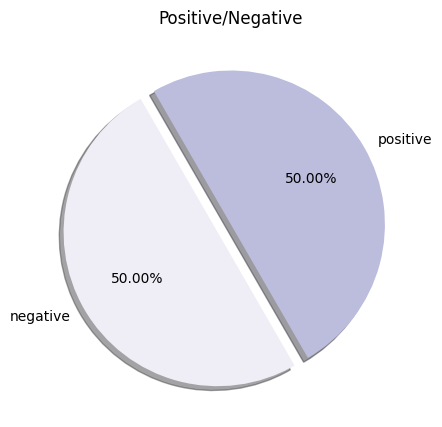

,sentiment
sentiment,
negative,25000
positive,25000


In [5]:
a , ax = plt.subplots(1,1,figsize=(10,5))
df['sentiment'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax,shadow=True, startangle=300, colors = ["#bcbddc", "#efedf5"])
ax.set_title('Positive/Negative')
ax.set_ylabel('')
plt.show()

df.groupby(['sentiment'])[['sentiment']].count() # Melihat jumlah melalui tabel

In [6]:
# Get stopwords from nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hyun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def clean_text(txt):

    text = BeautifulSoup(txt).get_text() # omit html tags
    text = re.sub("[^a-zA-Z]", ' ', text) # omit punctuations
    text = text.lower().split() # split and lowercase every word
    stopwords = set(nltk.corpus.stopwords.words('english')) # english stopwords
    text = [word for word in text if word not in stopwords] # omit stopwords from text

    return (' '.join(text))

uncleaned = df['review'][1]
cleaned = clean_text(df['review'][1])

print(f'Uncleaned:\n{uncleaned}\n')
print(f'Cleaned:\n{cleaned}\n')

Uncleaned:
A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly w

In [8]:
print('cleaning...')

for i in range(len(df['review'])):
    df['review'][i] = clean_text(df['review'][i])

print('done.')

cleaning...


C:\Users\hyun\AppData\Local\Temp\ipykernel_24084\3015090159.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(txt).get_text() # omit html tags


done.


In [9]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


In [10]:
train, test = train_test_split(df,
                               test_size=0.35) # 35/65 (test/train)

train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [11]:
print(train_y.value_counts(), '\n')
print(test_y.value_counts())

sentiment
negative    16260
positive    16240
Name: count, dtype: int64 

sentiment
positive    8760
negative    8740
Name: count, dtype: int64


## Training

In [12]:
# Vectorization (basically convert texts to vector of numerical data that the machine can understand later on)

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
test_x_vector = tfidf.transform(test_x)

In [13]:
# Fitting

model = LogisticRegression()
model.fit(train_x_vector, train_y)

LogisticRegression()

## Model Evaluation

In [14]:
# Mean Accuracy - 89% 
model.score(test_x_vector, test_y)

0.8912571428571429

In [15]:
# Classification Report
print(classification_report(test_y,
                      model.predict(test_x_vector),
                      labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.88      0.91      0.89      8760
    negative       0.90      0.87      0.89      8740

    accuracy                           0.89     17500
   macro avg       0.89      0.89      0.89     17500
weighted avg       0.89      0.89      0.89     17500



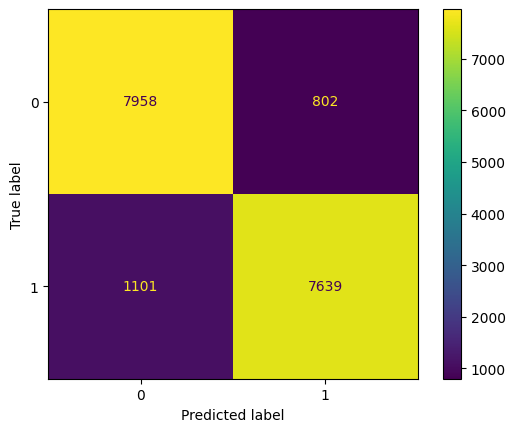

In [16]:
# Confusion Matrix
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,
                 model.predict(test_x_vector),
                 labels = ['positive', 'negative']))

cm.plot()
plt.show()

Some manual test

In [17]:
def predict_review(text):
    return model.predict(tfidf.transform([text]))

In [32]:
predict_review('The movie is good. i feel inspired.')[0]

'positive'

In [23]:
predict_review('The movie is so bad, not worth the money and time')[0]

'negative'

In [24]:
predict_review('The movie is so good that i fell asleep during the playback')[0]

'negative'

In [25]:
predict_review("""I don't like how the story goes, but i certainly love the cinematography and acting from the actors""")[0]

'positive'

In [26]:
review = """Ok I have watched three episodes and must say I am not impressed. It is quite mediocre and episode three was just a waste of my time. I expect better of Disney/Marvel. Even my Marvel obsessed daughter joined in a debate on whether Marvel has destroyed Cinema rather than watching the episode. Maybe it is too Disney!?!"""

predict_review(review)[0]

'negative'